In [1]:
import pandas as pd

In [ ]:
df = pd.read_csv("../data/현대_고객1600명_더미데이터.csv", encoding="utf-8")
df.drop("고객 세그먼트", axis=1, inplace=True)
df
# 거래 금액에 천단위 콤마 제거하고 숫자형으로 변환
df['거래 금액'] = df['거래 금액'].str.replace(',', '').astype(int)
car_features = ['거래 방식', '제품 출시년월', '제품 구매 날짜']
num_features = ['거래 금액', '제품 구매 빈도']

import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
# 전처리 파이프라인 생성
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), car_features)
    ]
)
# 클러스터링 파이프라인 생성
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=4, random_state=42))
])
# 클러스터링에 사용할 데이터 준비
X = df[num_features + car_features]
pipeline.fit(X)
# 클러스터 레이블 할당
df['Cluster'] = pipeline.named_steps['kmeans'].labels_

In [3]:
df

,이름,생년월일,연령,성별,휴대폰번호,이메일,주소,아이디,가입일,차량구분,구매한 제품,친환경차,제품 구매 날짜,거래 금액,거래 방식,제품 구매 빈도,제품 구매 경로,제품 출시년월,지역,Cluster
0,Robert Brown,1971-10-28,54,남,4332181960,robinsonwilliam@hoffman.net,"402 Peterson Drives Apt. 511, Davisstad, KS 06196",yherrera,2022-07-31,준중형 세단,Avante,N,2024-12-04,21100000,신용카드,2,온라인,2020-09,미국,1
1,Michael Wilson,1984-03-12,41,남,+1-959-310-3413x1647,mitchellclark@yahoo.com,"283 Steven Groves, Lake Mark, WI 07832",lydiatrujillo,2023-12-14,전기 세단,Ioniq 6,Y,2024-07-08,80410000,현금,1,오프라인,2023-01,미국,0
2,Robert Johnson,1968-10-01,57,남,953.767.2423,zhurst@yahoo.com,"710 Eric Estate, Carlsonfurt, PA 61849",tasha01,2025-02-22,중대형 SUV,Sorento,N,2025-03-20,63160000,현금,2,온라인,2021-04,미국,2
3,David Moore,1982-05-27,43,남,001-514-627-0482x81489,nathanielmartin@sellers.com,"USNV Allen, FPO AE 74865",millertodd,2022-07-16,전기 SUV,EV6,Y,2024-10-20,88060000,신용카드,1,오프라인,2022-05,미국,0
4,David Wilson,1972-10-20,53,여,(782)489-6383,pcarney@yahoo.com,"33150 Brianna Avenue Apt. 031, Port Markhaven,...",ilewis,2024-09-03,준중형 세단,Avante,N,2025-03-05,26010000,신용카드,2,온라인,2020-09,미국,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,Andres Hernandez,1976-12-15,49,여,1-707-279-2904,barriosmarcela@gmail.com,"Andador Sur Prado 167 Edif. 167 , Depto. 270, ...",tellezemiliano,2022-04-20,소형 SUV,Venue,N,2024-08-20,20850000,신용카드,1,오프라인,2021-01,멕시코,1
1596,Camila Hernandez,1978-04-19,47,여,(091)431-9384,fernando11@grupo.com,"Calle Norte Duarte 771 Edif. 304 , Depto. 238,...",cristina77,2022-05-23,전기 SUV,EV6,Y,2024-12-19,78020000,계좌이체,1,온라인,2022-05,멕시코,0
1597,Camila Torres,1995-09-21,30,여,525-399-1385x4131,fidel85@hotmail.com,"Circuito Guanajuato 334 Edif. 402 , Depto. 588...",ilara,2023-08-18,소형 해치백,i20,N,2024-02-23,21130000,현금,2,온라인,2020-05,멕시코,1
1598,Miguel Cruz,1969-09-14,56,여,1-996-460-8725,fsaldivar@yahoo.com,"Eje vial Sur Negrete 247 811, Nueva Mali, DGO ...",lucia93,2022-08-17,소형 SUV,Kona,Y,2024-05-28,43570000,계좌이체,1,온라인,2022-02,멕시코,2


In [4]:
# 클러스터 특성 분석
cluster_summary = df.groupby('Cluster')[num_features].mean()
print(cluster_summary)

                거래 금액  제품 구매 빈도
Cluster                        
0        8.066011e+07  1.569014
1        2.914838e+07  1.515267
2        5.686997e+07  1.313673
3        5.018782e+07  4.028736


In [5]:
# 0 VIP, 1 이탈가능, 2 신규, 3 일반

In [7]:
# 차량 종류 목록
vehicle_types = ['준중형 세단', '준대형 세단', '중형 SUV', '중형 세단', '준중형 해치백',
                 '대형 세단', '준중형 SUV', '준대형 SUV', '대형 SUV', '픽업트럭', '소형 해치백']

# 차량 컬럼에 랜덤으로 차량 종류 넣기
df['차량구분'] = np.random.choice(vehicle_types, size=len(df))

In [8]:
df

,이름,생년월일,연령,성별,휴대폰번호,이메일,주소,아이디,가입일,차량구분,구매한 제품,친환경차,제품 구매 날짜,거래 금액,거래 방식,제품 구매 빈도,제품 구매 경로,제품 출시년월,지역,Cluster
0,Robert Brown,1971-10-28,54,남,4332181960,robinsonwilliam@hoffman.net,"402 Peterson Drives Apt. 511, Davisstad, KS 06196",yherrera,2022-07-31,준대형 SUV,Avante,N,2024-12-04,21100000,신용카드,2,온라인,2020-09,미국,1
1,Michael Wilson,1984-03-12,41,남,+1-959-310-3413x1647,mitchellclark@yahoo.com,"283 Steven Groves, Lake Mark, WI 07832",lydiatrujillo,2023-12-14,준중형 SUV,Ioniq 6,Y,2024-07-08,80410000,현금,1,오프라인,2023-01,미국,0
2,Robert Johnson,1968-10-01,57,남,953.767.2423,zhurst@yahoo.com,"710 Eric Estate, Carlsonfurt, PA 61849",tasha01,2025-02-22,준중형 세단,Sorento,N,2025-03-20,63160000,현금,2,온라인,2021-04,미국,2
3,David Moore,1982-05-27,43,남,001-514-627-0482x81489,nathanielmartin@sellers.com,"USNV Allen, FPO AE 74865",millertodd,2022-07-16,픽업트럭,EV6,Y,2024-10-20,88060000,신용카드,1,오프라인,2022-05,미국,0
4,David Wilson,1972-10-20,53,여,(782)489-6383,pcarney@yahoo.com,"33150 Brianna Avenue Apt. 031, Port Markhaven,...",ilewis,2024-09-03,중형 SUV,Avante,N,2025-03-05,26010000,신용카드,2,온라인,2020-09,미국,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,Andres Hernandez,1976-12-15,49,여,1-707-279-2904,barriosmarcela@gmail.com,"Andador Sur Prado 167 Edif. 167 , Depto. 270, ...",tellezemiliano,2022-04-20,중형 SUV,Venue,N,2024-08-20,20850000,신용카드,1,오프라인,2021-01,멕시코,1
1596,Camila Hernandez,1978-04-19,47,여,(091)431-9384,fernando11@grupo.com,"Calle Norte Duarte 771 Edif. 304 , Depto. 238,...",cristina77,2022-05-23,픽업트럭,EV6,Y,2024-12-19,78020000,계좌이체,1,온라인,2022-05,멕시코,0
1597,Camila Torres,1995-09-21,30,여,525-399-1385x4131,fidel85@hotmail.com,"Circuito Guanajuato 334 Edif. 402 , Depto. 588...",ilara,2023-08-18,소형 해치백,i20,N,2024-02-23,21130000,현금,2,온라인,2020-05,멕시코,1
1598,Miguel Cruz,1969-09-14,56,여,1-996-460-8725,fsaldivar@yahoo.com,"Eje vial Sur Negrete 247 811, Nueva Mali, DGO ...",lucia93,2022-08-17,준대형 세단,Kona,Y,2024-05-28,43570000,계좌이체,1,온라인,2022-02,멕시코,2


In [9]:
df["구매한 제품"].unique()

array(['Avante', 'Ioniq 6', 'Sorento', 'EV6', 'Accent', 'Tucson',
       'Grandeur', 'Santa Fe', 'Sportage', 'Kona', 'NEXO', 'K5', 'G80',
       'Venue', 'GV70', 'Elantra', 'i20'], dtype=object)

In [10]:
# 차량 모델별 친환경차 여부 정보
environmental_info = {
    'Avante': False,
    'Ioniq 6': True,  # 전기차
    'Sorento': False,
    'EV6': True,  # 전기차
    'Accent': False,
    'Tucson': False,
    'Grandeur': False,
    'Santa Fe': False,
    'Sportage': False,
    'Kona': True,  # 전기차 모델도 있음
    'NEXO': True,  # 수소전기차
    'K5': False,
    'G80': False,
    'Venue': False,
    'GV70': False,
    'Elantra': False,
    'i20': False
}


In [11]:
# 친환경차 여부 컬럼 추가
df['친환경차'] = df['구매한 제품'].apply(lambda x: environmental_info.get(x, False))

In [12]:
df

,이름,생년월일,연령,성별,휴대폰번호,이메일,주소,아이디,가입일,차량구분,구매한 제품,친환경차,제품 구매 날짜,거래 금액,거래 방식,제품 구매 빈도,제품 구매 경로,제품 출시년월,지역,Cluster
0,Robert Brown,1971-10-28,54,남,4332181960,robinsonwilliam@hoffman.net,"402 Peterson Drives Apt. 511, Davisstad, KS 06196",yherrera,2022-07-31,준대형 SUV,Avante,False,2024-12-04,21100000,신용카드,2,온라인,2020-09,미국,1
1,Michael Wilson,1984-03-12,41,남,+1-959-310-3413x1647,mitchellclark@yahoo.com,"283 Steven Groves, Lake Mark, WI 07832",lydiatrujillo,2023-12-14,준중형 SUV,Ioniq 6,True,2024-07-08,80410000,현금,1,오프라인,2023-01,미국,0
2,Robert Johnson,1968-10-01,57,남,953.767.2423,zhurst@yahoo.com,"710 Eric Estate, Carlsonfurt, PA 61849",tasha01,2025-02-22,준중형 세단,Sorento,False,2025-03-20,63160000,현금,2,온라인,2021-04,미국,2
3,David Moore,1982-05-27,43,남,001-514-627-0482x81489,nathanielmartin@sellers.com,"USNV Allen, FPO AE 74865",millertodd,2022-07-16,픽업트럭,EV6,True,2024-10-20,88060000,신용카드,1,오프라인,2022-05,미국,0
4,David Wilson,1972-10-20,53,여,(782)489-6383,pcarney@yahoo.com,"33150 Brianna Avenue Apt. 031, Port Markhaven,...",ilewis,2024-09-03,중형 SUV,Avante,False,2025-03-05,26010000,신용카드,2,온라인,2020-09,미국,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,Andres Hernandez,1976-12-15,49,여,1-707-279-2904,barriosmarcela@gmail.com,"Andador Sur Prado 167 Edif. 167 , Depto. 270, ...",tellezemiliano,2022-04-20,중형 SUV,Venue,False,2024-08-20,20850000,신용카드,1,오프라인,2021-01,멕시코,1
1596,Camila Hernandez,1978-04-19,47,여,(091)431-9384,fernando11@grupo.com,"Calle Norte Duarte 771 Edif. 304 , Depto. 238,...",cristina77,2022-05-23,픽업트럭,EV6,True,2024-12-19,78020000,계좌이체,1,온라인,2022-05,멕시코,0
1597,Camila Torres,1995-09-21,30,여,525-399-1385x4131,fidel85@hotmail.com,"Circuito Guanajuato 334 Edif. 402 , Depto. 588...",ilara,2023-08-18,소형 해치백,i20,False,2024-02-23,21130000,현금,2,온라인,2020-05,멕시코,1
1598,Miguel Cruz,1969-09-14,56,여,1-996-460-8725,fsaldivar@yahoo.com,"Eje vial Sur Negrete 247 811, Nueva Mali, DGO ...",lucia93,2022-08-17,준대형 세단,Kona,True,2024-05-28,43570000,계좌이체,1,온라인,2022-02,멕시코,2


In [18]:
df.rename(columns={'Cluster': '고객 세그먼트'}, inplace=True)

In [19]:
df

,이름,생년월일,연령,성별,휴대폰번호,이메일,주소,아이디,가입일,차량구분,구매한 제품,친환경차,제품 구매 날짜,거래 금액,거래 방식,제품 구매 빈도,제품 구매 경로,제품 출시년월,지역,고객 세그먼트
0,Robert Brown,1971-10-28,54,남,4332181960,robinsonwilliam@hoffman.net,"402 Peterson Drives Apt. 511, Davisstad, KS 06196",yherrera,2022-07-31,준대형 SUV,Avante,False,2024-12-04,21100000,신용카드,2,온라인,2020-09,미국,1
1,Michael Wilson,1984-03-12,41,남,+1-959-310-3413x1647,mitchellclark@yahoo.com,"283 Steven Groves, Lake Mark, WI 07832",lydiatrujillo,2023-12-14,준중형 SUV,Ioniq 6,True,2024-07-08,80410000,현금,1,오프라인,2023-01,미국,0
2,Robert Johnson,1968-10-01,57,남,953.767.2423,zhurst@yahoo.com,"710 Eric Estate, Carlsonfurt, PA 61849",tasha01,2025-02-22,준중형 세단,Sorento,False,2025-03-20,63160000,현금,2,온라인,2021-04,미국,2
3,David Moore,1982-05-27,43,남,001-514-627-0482x81489,nathanielmartin@sellers.com,"USNV Allen, FPO AE 74865",millertodd,2022-07-16,픽업트럭,EV6,True,2024-10-20,88060000,신용카드,1,오프라인,2022-05,미국,0
4,David Wilson,1972-10-20,53,여,(782)489-6383,pcarney@yahoo.com,"33150 Brianna Avenue Apt. 031, Port Markhaven,...",ilewis,2024-09-03,중형 SUV,Avante,False,2025-03-05,26010000,신용카드,2,온라인,2020-09,미국,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,Andres Hernandez,1976-12-15,49,여,1-707-279-2904,barriosmarcela@gmail.com,"Andador Sur Prado 167 Edif. 167 , Depto. 270, ...",tellezemiliano,2022-04-20,중형 SUV,Venue,False,2024-08-20,20850000,신용카드,1,오프라인,2021-01,멕시코,1
1596,Camila Hernandez,1978-04-19,47,여,(091)431-9384,fernando11@grupo.com,"Calle Norte Duarte 771 Edif. 304 , Depto. 238,...",cristina77,2022-05-23,픽업트럭,EV6,True,2024-12-19,78020000,계좌이체,1,온라인,2022-05,멕시코,0
1597,Camila Torres,1995-09-21,30,여,525-399-1385x4131,fidel85@hotmail.com,"Circuito Guanajuato 334 Edif. 402 , Depto. 588...",ilara,2023-08-18,소형 해치백,i20,False,2024-02-23,21130000,현금,2,온라인,2020-05,멕시코,1
1598,Miguel Cruz,1969-09-14,56,여,1-996-460-8725,fsaldivar@yahoo.com,"Eje vial Sur Negrete 247 811, Nueva Mali, DGO ...",lucia93,2022-08-17,준대형 세단,Kona,True,2024-05-28,43570000,계좌이체,1,온라인,2022-02,멕시코,2


In [20]:
df.to_csv("../data/현대_고객1600명_더미데이터_클러스터링_차량구분_친환경차.csv", index=False, encoding="utf-8")

In [21]:
data = df

In [22]:
car_features = ['거래 방식', '제품 출시년월', '제품 구매 날짜']
num_features = ['거래 금액', '제품 구매 빈도']

In [23]:
target = '고객 세그먼트'

In [25]:
# 데이터 전처리 파이프라인 생성
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), car_features)
    ]
)

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [28]:
# 데이터 분할
X = data.drop(target, axis=1)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
### RandomForestClassifier 학습 및 평가 ###
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])
rf_pipeline.fit(X_train, y_train)
rf_pred = rf_pipeline.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))
print("\n")

Random Forest Accuracy: 0.98125
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       0.96      0.98      0.97       110
           2       0.97      0.95      0.96        78
           3       1.00      1.00      1.00        61

    accuracy                           0.98       320
   macro avg       0.98      0.98      0.98       320
weighted avg       0.98      0.98      0.98       320





In [30]:
### GradientBoostingClassifier 학습 및 평가 ###
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42))
])
gb_pipeline.fit(X_train, y_train)
gb_pred = gb_pipeline.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, gb_pred))
print("\n")

Gradient Boosting Accuracy: 0.98125
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       0.97      0.97      0.97       110
           2       0.96      0.96      0.96        78
           3       1.00      1.00      1.00        61

    accuracy                           0.98       320
   macro avg       0.98      0.98      0.98       320
weighted avg       0.98      0.98      0.98       320





In [31]:
### SVC 학습 및 평가 ###
svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))
])
svm_pipeline.fit(X_train, y_train)
svm_pred = svm_pipeline.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("SVM Classification Report:\n", classification_report(y_test, svm_pred))
print("\n")

SVM Accuracy: 0.9875
SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       0.96      1.00      0.98       110
           2       1.00      0.95      0.97        78
           3       1.00      1.00      1.00        61

    accuracy                           0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320





In [32]:
import joblib

In [33]:
joblib.dump(svm_pipeline, "model/svm_pipeline.pkl")

['model/svm_pipeline.pkl']

In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [35]:
df

,이름,생년월일,연령,성별,휴대폰번호,이메일,주소,아이디,가입일,차량구분,구매한 제품,친환경차,제품 구매 날짜,거래 금액,거래 방식,제품 구매 빈도,제품 구매 경로,제품 출시년월,지역,고객 세그먼트
0,Robert Brown,1971-10-28,54,남,4332181960,robinsonwilliam@hoffman.net,"402 Peterson Drives Apt. 511, Davisstad, KS 06196",yherrera,2022-07-31,준대형 SUV,Avante,False,2024-12-04,21100000,신용카드,2,온라인,2020-09,미국,1
1,Michael Wilson,1984-03-12,41,남,+1-959-310-3413x1647,mitchellclark@yahoo.com,"283 Steven Groves, Lake Mark, WI 07832",lydiatrujillo,2023-12-14,준중형 SUV,Ioniq 6,True,2024-07-08,80410000,현금,1,오프라인,2023-01,미국,0
2,Robert Johnson,1968-10-01,57,남,953.767.2423,zhurst@yahoo.com,"710 Eric Estate, Carlsonfurt, PA 61849",tasha01,2025-02-22,준중형 세단,Sorento,False,2025-03-20,63160000,현금,2,온라인,2021-04,미국,2
3,David Moore,1982-05-27,43,남,001-514-627-0482x81489,nathanielmartin@sellers.com,"USNV Allen, FPO AE 74865",millertodd,2022-07-16,픽업트럭,EV6,True,2024-10-20,88060000,신용카드,1,오프라인,2022-05,미국,0
4,David Wilson,1972-10-20,53,여,(782)489-6383,pcarney@yahoo.com,"33150 Brianna Avenue Apt. 031, Port Markhaven,...",ilewis,2024-09-03,중형 SUV,Avante,False,2025-03-05,26010000,신용카드,2,온라인,2020-09,미국,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,Andres Hernandez,1976-12-15,49,여,1-707-279-2904,barriosmarcela@gmail.com,"Andador Sur Prado 167 Edif. 167 , Depto. 270, ...",tellezemiliano,2022-04-20,중형 SUV,Venue,False,2024-08-20,20850000,신용카드,1,오프라인,2021-01,멕시코,1
1596,Camila Hernandez,1978-04-19,47,여,(091)431-9384,fernando11@grupo.com,"Calle Norte Duarte 771 Edif. 304 , Depto. 238,...",cristina77,2022-05-23,픽업트럭,EV6,True,2024-12-19,78020000,계좌이체,1,온라인,2022-05,멕시코,0
1597,Camila Torres,1995-09-21,30,여,525-399-1385x4131,fidel85@hotmail.com,"Circuito Guanajuato 334 Edif. 402 , Depto. 588...",ilara,2023-08-18,소형 해치백,i20,False,2024-02-23,21130000,현금,2,온라인,2020-05,멕시코,1
1598,Miguel Cruz,1969-09-14,56,여,1-996-460-8725,fsaldivar@yahoo.com,"Eje vial Sur Negrete 247 811, Nueva Mali, DGO ...",lucia93,2022-08-17,준대형 세단,Kona,True,2024-05-28,43570000,계좌이체,1,온라인,2022-02,멕시코,2


In [36]:
df.drop("고객 세그먼트", axis=1, inplace=True)

In [37]:
df

,이름,생년월일,연령,성별,휴대폰번호,이메일,주소,아이디,가입일,차량구분,구매한 제품,친환경차,제품 구매 날짜,거래 금액,거래 방식,제품 구매 빈도,제품 구매 경로,제품 출시년월,지역
0,Robert Brown,1971-10-28,54,남,4332181960,robinsonwilliam@hoffman.net,"402 Peterson Drives Apt. 511, Davisstad, KS 06196",yherrera,2022-07-31,준대형 SUV,Avante,False,2024-12-04,21100000,신용카드,2,온라인,2020-09,미국
1,Michael Wilson,1984-03-12,41,남,+1-959-310-3413x1647,mitchellclark@yahoo.com,"283 Steven Groves, Lake Mark, WI 07832",lydiatrujillo,2023-12-14,준중형 SUV,Ioniq 6,True,2024-07-08,80410000,현금,1,오프라인,2023-01,미국
2,Robert Johnson,1968-10-01,57,남,953.767.2423,zhurst@yahoo.com,"710 Eric Estate, Carlsonfurt, PA 61849",tasha01,2025-02-22,준중형 세단,Sorento,False,2025-03-20,63160000,현금,2,온라인,2021-04,미국
3,David Moore,1982-05-27,43,남,001-514-627-0482x81489,nathanielmartin@sellers.com,"USNV Allen, FPO AE 74865",millertodd,2022-07-16,픽업트럭,EV6,True,2024-10-20,88060000,신용카드,1,오프라인,2022-05,미국
4,David Wilson,1972-10-20,53,여,(782)489-6383,pcarney@yahoo.com,"33150 Brianna Avenue Apt. 031, Port Markhaven,...",ilewis,2024-09-03,중형 SUV,Avante,False,2025-03-05,26010000,신용카드,2,온라인,2020-09,미국
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,Andres Hernandez,1976-12-15,49,여,1-707-279-2904,barriosmarcela@gmail.com,"Andador Sur Prado 167 Edif. 167 , Depto. 270, ...",tellezemiliano,2022-04-20,중형 SUV,Venue,False,2024-08-20,20850000,신용카드,1,오프라인,2021-01,멕시코
1596,Camila Hernandez,1978-04-19,47,여,(091)431-9384,fernando11@grupo.com,"Calle Norte Duarte 771 Edif. 304 , Depto. 238,...",cristina77,2022-05-23,픽업트럭,EV6,True,2024-12-19,78020000,계좌이체,1,온라인,2022-05,멕시코
1597,Camila Torres,1995-09-21,30,여,525-399-1385x4131,fidel85@hotmail.com,"Circuito Guanajuato 334 Edif. 402 , Depto. 588...",ilara,2023-08-18,소형 해치백,i20,False,2024-02-23,21130000,현금,2,온라인,2020-05,멕시코
1598,Miguel Cruz,1969-09-14,56,여,1-996-460-8725,fsaldivar@yahoo.com,"Eje vial Sur Negrete 247 811, Nueva Mali, DGO ...",lucia93,2022-08-17,준대형 세단,Kona,True,2024-05-28,43570000,계좌이체,1,온라인,2022-02,멕시코


In [39]:
df1 = pd.read_csv("..\main_project\project_1\data_mini1\클러스터링고객데이터_5.csv")

In [41]:
df1.drop(["고객 세그먼트","Cluster","시구"]  , axis=1, inplace=True)

In [43]:
df1["지역"] = "대한민국"

In [52]:
df1["휴대폰번호"] = df1["휴대폰번호"].astype(str)

In [53]:
df1.columns

Index(['이름', '생년월일', '연령', '성별', '휴대폰번호', '이메일', '주소', '아이디', '가입일', '차량구분',
       '구매한 제품', '친환경차', '제품 구매 날짜', '거래 금액', '거래 방식', '제품 구매 빈도', '제품 구매 경로',
       '제품 출시년월', '지역'],
      dtype='object')

In [54]:
data.columns

Index(['이름', '생년월일', '연령', '성별', '휴대폰번호', '이메일', '주소', '아이디', '가입일', '차량구분',
       '구매한 제품', '친환경차', '제품 구매 날짜', '거래 금액', '거래 방식', '제품 구매 빈도', '제품 구매 경로',
       '제품 출시년월', '지역'],
      dtype='object')

In [61]:
df_new1 = pd.concat([data, df1])

In [49]:
df1.to_csv("클러스터링고객데이터.csv", index=False, encoding="utf-8")

In [ ]:
df_new1

In [63]:
df_new1
car_features = ['거래 방식', '제품 출시년월', '제품 구매 날짜']
num_features = ['거래 금액', '제품 구매 빈도']

import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
# 전처리 파이프라인 생성
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), car_features)
    ]
)
# 클러스터링 파이프라인 생성
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=4, random_state=42))
])
# 클러스터링에 사용할 데이터 준비
X = df_new1[num_features + car_features]
pipeline.fit(X)
# 클러스터 레이블 할당
df_new1['고객 세그먼트'] = pipeline.named_steps['kmeans'].labels_

In [66]:
df_new1

,이름,생년월일,연령,성별,휴대폰번호,이메일,주소,아이디,가입일,차량구분,구매한 제품,친환경차,제품 구매 날짜,거래 금액,거래 방식,제품 구매 빈도,제품 구매 경로,제품 출시년월,지역,고객 세그먼트
0,Robert Brown,1971-10-28,54,남,4332181960,robinsonwilliam@hoffman.net,"402 Peterson Drives Apt. 511, Davisstad, KS 06196",yherrera,2022-07-31,준대형 SUV,Avante,False,2024-12-04,21100000,신용카드,2,온라인,2020-09,미국,2
1,Michael Wilson,1984-03-12,41,남,+1-959-310-3413x1647,mitchellclark@yahoo.com,"283 Steven Groves, Lake Mark, WI 07832",lydiatrujillo,2023-12-14,준중형 SUV,Ioniq 6,True,2024-07-08,80410000,현금,1,오프라인,2023-01,미국,1
2,Robert Johnson,1968-10-01,57,남,953.767.2423,zhurst@yahoo.com,"710 Eric Estate, Carlsonfurt, PA 61849",tasha01,2025-02-22,준중형 세단,Sorento,False,2025-03-20,63160000,현금,2,온라인,2021-04,미국,1
3,David Moore,1982-05-27,43,남,001-514-627-0482x81489,nathanielmartin@sellers.com,"USNV Allen, FPO AE 74865",millertodd,2022-07-16,픽업트럭,EV6,True,2024-10-20,88060000,신용카드,1,오프라인,2022-05,미국,1
4,David Wilson,1972-10-20,53,여,(782)489-6383,pcarney@yahoo.com,"33150 Brianna Avenue Apt. 031, Port Markhaven,...",ilewis,2024-09-03,중형 SUV,Avante,False,2025-03-05,26010000,신용카드,2,온라인,2020-09,미국,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,radasd,2005-03-31,20,남,1092563500,dmdals1012@naver.com,경기도 이천시 부발읍,dmdals1012,2025-03-31,준중형 세단,i30 (PD),부,2025-03-31,25560000,카드,1,오프라인,2017-09,대한민국,0
310,김응민,2005-03-31,20,남,1092563500,dmdals1012@naver.com,경기도 이천시 부발읍,dmdals1012,2025-03-31,준중형 세단,i30 (PD),부,2025-03-31,25560000,카드,1,오프라인,2017-09,대한민국,0
311,김응민,2005-03-31,20,남,1092563500,dmdals1012@naver.com,경기도 이천시 부발읍,dmdals1012,2025-03-31,준중형 세단,i30 (PD),부,2025-03-31,25560000,카드,1,오프라인,2017-09,대한민국,0
312,김응민,2005-03-31,20,남,1092563500,dmdals1012@naver.com,경기도 이천시 부발읍,dmdals1012,2025-03-31,준중형 세단,i30 (PD),부,2025-03-31,25560000,카드,1,오프라인,2017-09,대한민국,0


In [65]:
# 클러스터 특성 분석
cluster_summary = df_new1.groupby('고객 세그먼트')[num_features].mean()
print(cluster_summary)

                거래 금액  제품 구매 빈도
고객 세그먼트                        
0        3.020675e+07  1.505650
1        7.350374e+07  1.519062
2        3.738475e+07  1.480094
3        5.222652e+07  4.144124


In [ ]:
# 0 이탈가능, 1 VIP, 2 신규, 3 일반

In [76]:
df_new1.loc[df_new1["친환경차"]=='여', "친환경차"] = True

In [77]:
df_new1["친환경차"].unique()

array([False, True], dtype=object)

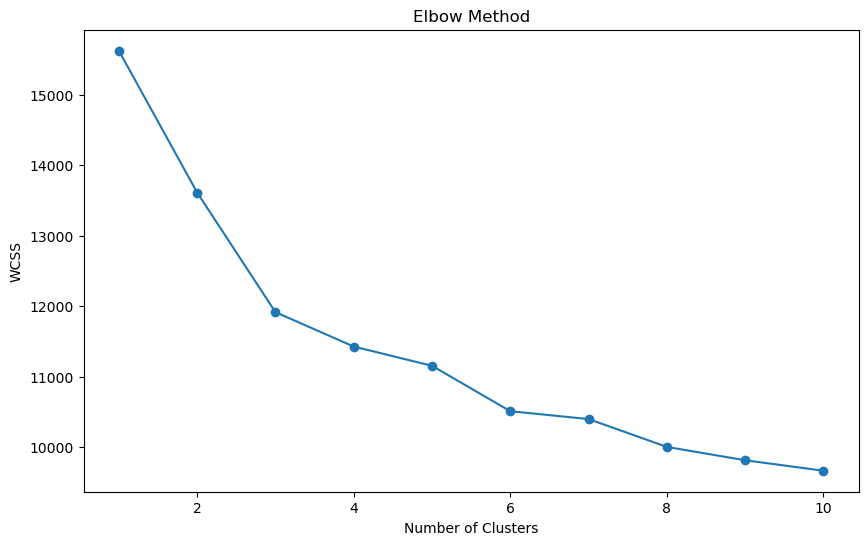

In [78]:
df_new1
# 범주형과 수치형 컬럼 나누기
categorical_features = ['성별', '차량구분', '거래 방식', '제품 출시년월', '제품 구매 날짜', '고객 세그먼트', '친환경차']
numerical_features = ['연령', '거래 금액', '제품 구매 빈도']
# 데이터 전처리 파이프라인 생성
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)
# 전처리된 데이터 생성
X = preprocessor.fit_transform(df_new1)
# WCSS 계산 및 시각화
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [79]:
# K-Means 클러스터링 수행 (k=6)
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
kmeans.fit(X)
# 클러스터 레이블 추가
df_new1['Cluster'] = kmeans.labels_

In [80]:
df_new1

,이름,생년월일,연령,성별,휴대폰번호,이메일,주소,아이디,가입일,차량구분,...,친환경차,제품 구매 날짜,거래 금액,거래 방식,제품 구매 빈도,제품 구매 경로,제품 출시년월,지역,고객 세그먼트,Cluster
0,Robert Brown,1971-10-28,54,남,4332181960,robinsonwilliam@hoffman.net,"402 Peterson Drives Apt. 511, Davisstad, KS 06196",yherrera,2022-07-31,준대형 SUV,...,False,2024-12-04,21100000,신용카드,2,온라인,2020-09,미국,2,5
1,Michael Wilson,1984-03-12,41,남,+1-959-310-3413x1647,mitchellclark@yahoo.com,"283 Steven Groves, Lake Mark, WI 07832",lydiatrujillo,2023-12-14,준중형 SUV,...,True,2024-07-08,80410000,현금,1,오프라인,2023-01,미국,1,1
2,Robert Johnson,1968-10-01,57,남,953.767.2423,zhurst@yahoo.com,"710 Eric Estate, Carlsonfurt, PA 61849",tasha01,2025-02-22,준중형 세단,...,False,2025-03-20,63160000,현금,2,온라인,2021-04,미국,1,2
3,David Moore,1982-05-27,43,남,001-514-627-0482x81489,nathanielmartin@sellers.com,"USNV Allen, FPO AE 74865",millertodd,2022-07-16,픽업트럭,...,True,2024-10-20,88060000,신용카드,1,오프라인,2022-05,미국,1,1
4,David Wilson,1972-10-20,53,여,(782)489-6383,pcarney@yahoo.com,"33150 Brianna Avenue Apt. 031, Port Markhaven,...",ilewis,2024-09-03,중형 SUV,...,False,2025-03-05,26010000,신용카드,2,온라인,2020-09,미국,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,radasd,2005-03-31,20,남,1092563500,dmdals1012@naver.com,경기도 이천시 부발읍,dmdals1012,2025-03-31,준중형 세단,...,False,2025-03-31,25560000,카드,1,오프라인,2017-09,대한민국,0,0
310,김응민,2005-03-31,20,남,1092563500,dmdals1012@naver.com,경기도 이천시 부발읍,dmdals1012,2025-03-31,준중형 세단,...,False,2025-03-31,25560000,카드,1,오프라인,2017-09,대한민국,0,0
311,김응민,2005-03-31,20,남,1092563500,dmdals1012@naver.com,경기도 이천시 부발읍,dmdals1012,2025-03-31,준중형 세단,...,False,2025-03-31,25560000,카드,1,오프라인,2017-09,대한민국,0,0
312,김응민,2005-03-31,20,남,1092563500,dmdals1012@naver.com,경기도 이천시 부발읍,dmdals1012,2025-03-31,준중형 세단,...,False,2025-03-31,25560000,카드,1,오프라인,2017-09,대한민국,0,0


In [83]:
# 클러스터별 평균 거래 금액, 제품 구매 빈도, 연령 확인
cluster_summary = df_new1.groupby('Cluster')[['거래 금액', '제품 구매 빈도', '연령']].mean()
print(cluster_summary)

                거래 금액  제품 구매 빈도         연령
Cluster                                   
0        3.020675e+07  1.505650  42.855932
1        7.311748e+07  1.478754  33.821530
2        7.379634e+07  1.561934  52.513595
3        5.079075e+07  4.162055  53.758893
4        5.406111e+07  4.121212  33.449495
5        3.730772e+07  1.480000  43.430588


In [84]:
categorical_features = ['성별', '차량구분', '거래 방식', '고객 세그먼트', '친환경차']
for feature in categorical_features:
    print(f"{feature} 분포:")
    print(df_new1.groupby('Cluster')[feature].value_counts())
    print("\n")

성별 분포:
Cluster  성별
0        여     184
         남     170
1        남     220
         여     133
2        여     196
         남     135
3        남     134
         여     119
4        남     100
         여      98
5        남     214
         여     211
Name: count, dtype: int64


차량구분 분포:
Cluster  차량구분   
0        준중형 세단     47
         준중형 해치백    35
         소형 해치백     34
         준대형 세단     34
         중형 SUV     33
                    ..
5        준중형 SUV    27
         중형 suv      6
          중형 suv     5
         대형 suv      3
         준중형 suv     2
Name: count, Length: 84, dtype: int64


거래 방식 분포:
Cluster  거래 방식
0        계좌이체     224
         현금       105
         카드        25
1        현금       128
         계좌이체     106
         신용카드     104
         카드        15
2        현금       131
         계좌이체     113
         신용카드      74
         카드        13
3        현금       117
         신용카드      60
         계좌이체      47
         카드        29
4        현금        91
         계좌이체      49
       

In [86]:
df_new1.to_csv("../data/현대_고객_데이터_완성.csv", index=False, encoding="utf-8")

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [2]:
data = pd.read_csv("../data/현대_고객_데이터_완성.csv", encoding="utf-8")

In [ ]:
# 타겟 변수 설정
target = '고객 세그먼트'
car_features = ['거래 방식', '제품 출시년월', '제품 구매 날짜']
num_features = ['거래 금액', '제품 구매 빈도']
# 데이터 전처리 파이프라인 생성
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), car_features)
    ]
)
# 모델 파이프라인 생성
pipelines = {
    'Random Forest': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
    ]),
    'Gradient Boosting': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42))
    ]),
    'SVM': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', SVC(random_state=42))
    ])
}
# 데이터 분할
X = data.drop(target, axis=1)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### RandomForestClassifier 학습 및 평가 ###
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])
rf_pipeline.fit(X_train, y_train)
rf_pred = rf_pipeline.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))
print("\n")
### GradientBoostingClassifier 학습 및 평가 ###
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42))
])
gb_pipeline.fit(X_train, y_train)
gb_pred = gb_pipeline.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, gb_pred))
print("\n")

### SVC 학습 및 평가 ###
svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))
])
svm_pipeline.fit(X_train, y_train)
svm_pred = svm_pipeline.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("SVM Classification Report:\n", classification_report(y_test, svm_pred))
print("\n")
import joblib
joblib.dump(gb_pipeline, 'model/gb_model.pkl')

In [3]:
# 타겟 변수 설정
target = '고객 세그먼트'
car_features = ['거래 방식', '제품 출시년월', '제품 구매 날짜']
num_features = ['거래 금액', '제품 구매 빈도']
# 데이터 전처리 파이프라인 생성
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), car_features)
    ]
)

In [4]:
# 모델 파이프라인 생성
pipelines = {
    'Random Forest': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
    ]),
    'Gradient Boosting': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42))
    ]),
    'SVM': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', SVC(random_state=42))
    ])
}

In [5]:
# 데이터 분할
X = data.drop(target, axis=1)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
### RandomForestClassifier 학습 및 평가 ###
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])
rf_pipeline.fit(X_train, y_train)
rf_pred = rf_pipeline.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))
print("\n")

Random Forest Accuracy: 0.978891820580475
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        61
           1       0.97      0.99      0.98       140
           2       0.98      0.99      0.98        88
           3       1.00      0.93      0.97        90

    accuracy                           0.98       379
   macro avg       0.98      0.98      0.98       379
weighted avg       0.98      0.98      0.98       379





In [7]:
### GradientBoostingClassifier 학습 및 평가 ###
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42))
])
gb_pipeline.fit(X_train, y_train)
gb_pred = gb_pipeline.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, gb_pred))
print("\n")

Gradient Boosting Accuracy: 0.9973614775725593
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       0.99      1.00      1.00       140
           2       1.00      0.99      0.99        88
           3       1.00      1.00      1.00        90

    accuracy                           1.00       379
   macro avg       1.00      1.00      1.00       379
weighted avg       1.00      1.00      1.00       379





In [8]:
### SVC 학습 및 평가 ###
svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))
])
svm_pipeline.fit(X_train, y_train)
svm_pred = svm_pipeline.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("SVM Classification Report:\n", classification_report(y_test, svm_pred))
print("\n")

SVM Accuracy: 0.9841688654353562
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        61
           1       0.99      0.98      0.98       140
           2       0.97      0.99      0.98        88
           3       1.00      0.99      0.99        90

    accuracy                           0.98       379
   macro avg       0.98      0.98      0.98       379
weighted avg       0.98      0.98      0.98       379





In [10]:
import joblib
joblib.dump(gb_pipeline, 'model/gb_model_hs.pkl')

['model/gb_model_hs.pkl']